In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BlackFriday.csv')

del df["Product_Category_2"]
del df["Product_Category_3"]

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [4]:
for column in df.columns:
    print(df[column].nunique(), "\t:", column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


In [5]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

## Navie Approach

In [6]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [7]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

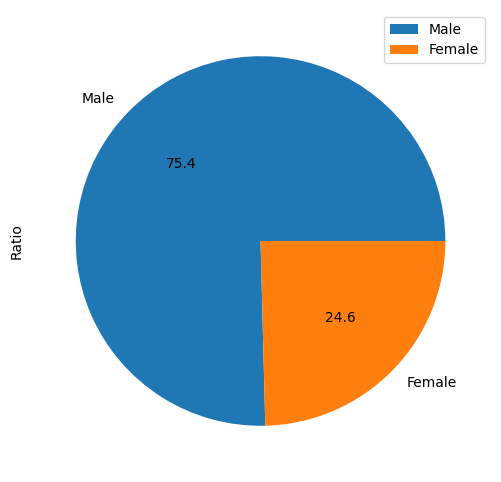

In [8]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

## Second Approach

In [9]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

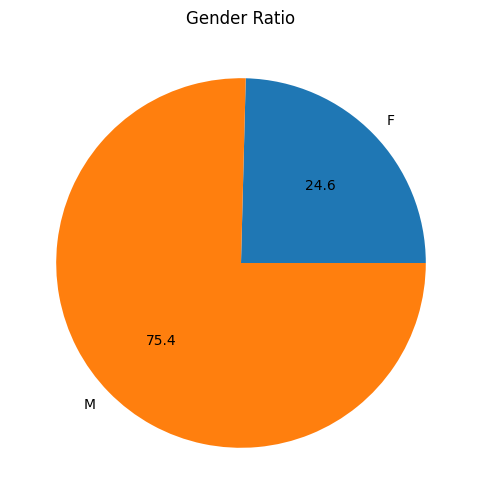

In [10]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.1f", title = "Gender Ratio", figsize = (6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

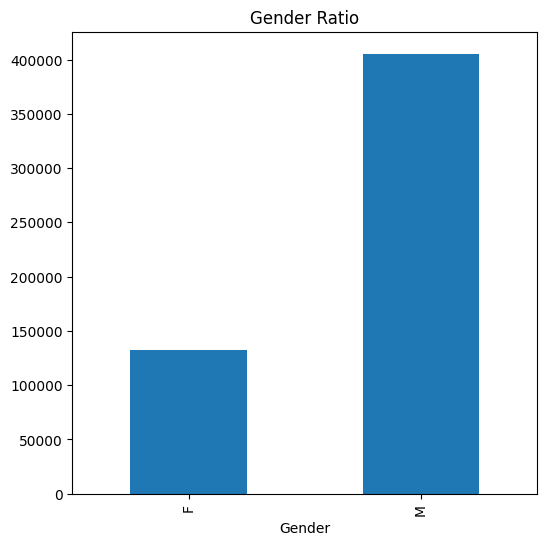

In [11]:
df.groupby('Gender').size().plot(kind = 'bar', title = "Gender Ratio", figsize = (6,6))

In [12]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

In [13]:
df.groupby('Gender').sum()['Purchase'] 

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

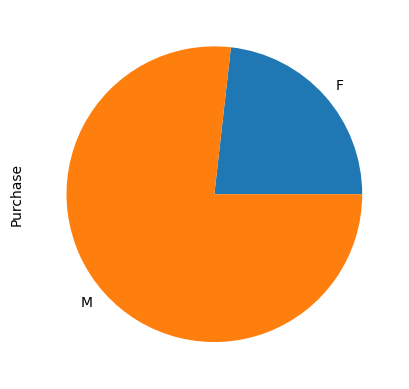

In [14]:
df.groupby('Gender').sum()['Purchase'].plot(kind = "pie")

<Axes: ylabel='Purchase'>

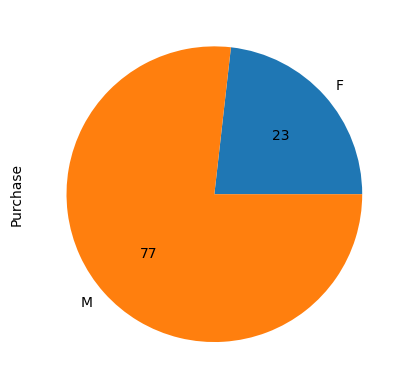

In [15]:
df.groupby('Gender').sum()['Purchase'].plot(kind = "pie", autopct = "%01.f")

<Axes: ylabel='Purchase'>

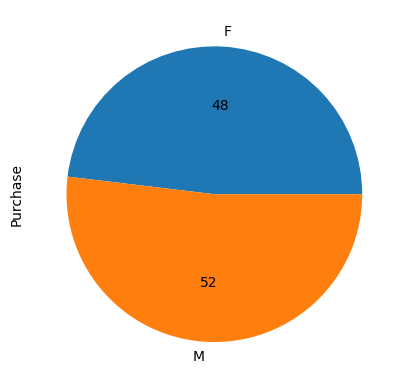

In [17]:
df.groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind = "pie", autopct = "%01.f")